<a href="https://colab.research.google.com/github/zhangshi0512/Leetcode/blob/main/Udemy_Data_Structure_and_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **# 1. Sorted Squared Array**
You are given an array of Integers in which each subsequent value is not less than the previous value. Write a function that takes this array as an input and returns a new array with the squares of each number sorted in ascending order.

  Ask for clarification.
  *   Any negative integers in the array?
  *   Any identical integers?
  *   Is the array in order?
  *   Is the array empty?

  For Example:
  *   [1,3,5] -> [1,9,25]
  *   [2,3,3] -> [4,9,9]
  *   [-4,-2,0,1,3] -> [0,1,4,9,16]

  # Method 1: Brute Force Method

Given [-3,1,2,7]

1.square each elelment and put them in a new array 
-> [9,1,4,49]

(**T = O(n); S = O(n)**)

2.sort this new array 
-> [1,4,9,49]

(**T = O(nlogn); S = O(n)**)

This method takes a time complexity of (n + nlogn), with n << nlogn, the actual time complexity is nlogn

In [ ]:
# Time = O(nlogn)  Space = O(n)
def sorted_squared(array):
    new_array = [0]*len(array)
    for i in range(len(array)):
        new_array[i] = array[i]**2
        # new_array[i] = array[i]*array[i]
    new_array.sort()
    return new_array


print(sorted_squared([-5, 1, 2]))
print(sorted_squared([0, 1, 2]))
print(sorted_squared([]))

[1, 4, 25]
[0, 1, 4]
[]


# Method 2: Two Pointer
Given: [-5, -4, -2, 1, 9, 12]

1.create an new array that is the same length of given array ->new_array = [0] * len(array) 

2.setup two pointers from the beginning and the end of the given array -> i = 0; j = len(array)-1

3.Instead of sorting, compare the squared values based on the pointers, and fill the new array in reverse order with the larger number -> **(T = O(n); S = O(n))**

for k in reversed(range(len(array))), 
  
  val_i = array[i]**2 
  
  i += 1
  (remember to move the pointer if this is the larger value, keep the pointer if it is not)
  
  val_j = array[j]**2 
  
  j -= 1
  (remember to move the pointer if this is the larger value, keep the pointer if it is not)
  
  new_array[k] = the larger number of (val_i, val_j)

In [ ]:
# Time = O(n) Space = O(n)
def sorted_squared(array):
    i = 0
    j = len(array) - 1
    new_array = [0] * len(array)
    for k in reversed(range(len(array))):
        sq_i = array[i]**2
        sq_j = array[j]**2
        if sq_i > sq_j:
            new_array[k] = sq_i
            i += 1
        else:
            new_array[k] = sq_j
            j -= 1
    return new_array

print(sorted_squared([-5, 1, 2]))
print(sorted_squared([0, 1, 2]))
print(sorted_squared([]))
print(sorted_squared([-5,-4,-2, 1, 9,12]))


[1, 4, 25]
[0, 1, 4]
[]
[1, 4, 16, 25, 81, 144]


# **# 2. Monotonic Array**
An array is monotonic if it is either monotone increasing or monotone decreasing. An array is monotone increasing if all its elements from left to right are non-decreasing. An array is monotone decreasing if all  its elements from left to right are non-increasing. Given an integer array return true if the given array is monotonic, or false otherwise. 

Ask for clarification.


*   Is an empty array monotonic?
*   Is an array with only 1 integer monotonic?

For Example:


*   [1,2,3] -> true
*   [3,2,1] -> true
*   [1,2,2] -> true
*   [3,3,3] -> true
*   [1,6,2] -> false
*   [] -> true
*   [0] -> true

# Method: Head and Tail
Given:
1. [3, _, _, _, 7]
2. [3, _, _, _, 3]
3. [3, _, _, _, -5]

Check the first and last element in this array to determine whether it is non increasing or non decreasing.

And then verify the elements in between based on the three scenarios above. 



In [ ]:
def monotonic_array(array):
    # consider the tendency of array when it is not empty
    while len(array) > 0:
      first = array[0]
      last = array[len(array)-1]
      if first > last:
          for i in range(len(array)-1):
              if array[i] < array[i+1]:
                  return False
      elif first == last:
          for i in range(len(array)-1):
              if array[i] != array[i+1]:
                  return False
      else:
          for i in range(len(array)-1):
              if array[i] > array[i+1]:
                  return False
      return True
    # consider empty array as monotonic array
    while len(array) == 0:
      return True


print(monotonic_array([1]))
print(monotonic_array([3,1,4,2]))
print(monotonic_array([]))
print(monotonic_array([1,2,3,3,5]))

True
False
True
True


# **# 3. Rotate Array**

Given an array, rotate the array to the right by k steps, where k is non-negative.

Ask for clarification.
*   What happens if an empty array is passed? -> return an empty array
*   If k = 0, no rotation is to happen? -> Yes

For Example:
*   [1,2] k=1 -> [2,1]
*   [1,2] k=2 -> [2,1] -> [1,2]
*   [1,2,3,4] k=3 -> [4,1,2,3] -> [3,4,1,2] -> [2,3,4,1]
*   [1,2,3,4] k=0 -> [1,2,3,4]
*   [] k=5 -> []

# Method 1: Brute Force Method (Not Valid on Leetcode)
Given [1,2,3,4]， k=3

1.check the remainder of array length divided by k, this determines how many of nums need to be rotate

2.slicing the given array and reassemble as a new array, return new array

**T = O(n x k); S = O(1)**


In [ ]:
def rotate_array(k, array):
  if k==0 or len(array)==0:
    return array
  else:
    k = k%len(array)
    subarraykeep = array[:-k]
    subarrayrotate = array[-k:]
    subarrayrotate.extend(subarraykeep)
    return subarrayrotate

print(rotate_array(3, [1,2,3,4]))
print(rotate_array(2, [1,2]))
print(rotate_array(2, [-1,-100,3,99]))
print(rotate_array(3, [1,2,3,4,5,6,7]))

[2, 3, 4, 1]
[1, 2]
[3, 99, -1, -100]
[5, 6, 7, 1, 2, 3, 4]


# Method 2: Shift & Use extra array

Store rotate elements in a temp array

Shift the elements on the left to the right by k

Assign the elements on the left from stored temp array

**T = O(n); S = O(k)**



In [ ]:
def rotate_array(k, array):
    if len(array) == 0: return []
    # get the actual rotate times by finding k remainder of array length
    k=k%len(array)
    # store the rotate array in a subarray
    temp = array[-k:]
    # shift the elements from left to right by adding k to its index
    for i in reversed(range(0,len(array)-k)):
        array[i+k]=array[i]
    # assign the empty elements on the left from the stored subarray
    for i in range(len(temp)):
        array[i]=temp[i]
    return array

print(rotate_array(3, [1,2,3,4]))
print(rotate_array(2, [1,2]))
print(rotate_array(2, [-1,-100,3,99]))
print(rotate_array(3, [1,2,3,4,5,6,7]))

[2, 3, 4, 1]
[1, 2]
[3, 99, -1, -100]
[5, 6, 7, 1, 2, 3, 4]


# Method 3: Using Reverse
Given: [1,2,3,4,5,6,7], k=3 -> [5,6,7,1,2,3,4]

First reverse all elements of the array

[7,6,5,4,3,2,1]

Then reverse the first k elements
[5,6,7,4,3,2,1]

Last reverse the rest n-k elements
[5,6,7,1,2,3,4]

**T = O(n); S = O(1)**

In [ ]:
def reverse(array,start,end):
    while(start<end):
        array[start],array[end] = array[end], array[start]
        start +=1
        end -=1
    return array

def rotate_array(k, array):
    k= k % len(array)
    reverse(array, 0, len(array)-1)
    reverse(array, 0, k-1)
    reverse(array, k, len(array)-1)
    return array

print(rotate_array(3, [1,2,3,4]))
print(rotate_array(2, [1,2]))
print(rotate_array(2, [-1,-100,3,99]))
print(rotate_array(3, [1,2,3,4,5,6,7]))

[2, 3, 4, 1]
[1, 2]
[3, 99, -1, -100]
[5, 6, 7, 1, 2, 3, 4]


# **# 4. Container with most Water**

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]). Find two lines that together with the x-axis form a container, such that the container contains the most water(depth is constant across containers). Return the area(that the 2 lines and the X axis make) of container which can store the max amount of water. Notice that you may not slant the container.

Ask for clarifications:
*   Does Y axis count as a wall？
*   Does a line inside the container affect area?
*   Will the given height a single number?


For Example:

Input: height = [1,8,6,2,5,4,8,3,7]

Output: 49

Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.

Input: height = [1,1]

Output: 1

# Method 1: Brute Force
**T = O(n^2); S = O(1)**

In [ ]:
def maxArea(height):
  maxArea = 0
  for i in range(0,len(height)-1):
    for j in range(i+1, len(height)):
      area = min(height[i],height[j])*(j-i)
      maxArea = max(area, maxArea)

  return maxArea

print(maxArea([1,8,6,2,5,4,8,3,7]))
print(maxArea([1,1,2]))

49
2


# Method 2: Two Pointers

**T = O(n)**

**S = O(1)**

In [ ]:
def maxArea_optimum(height):
  left = 0
  right = len(height)-1
  max_area = 0
  while left < right:
    area = min(height[left], height[right])*(right - left)
    max_area = max(area, max_area)
    if height[left]<height[right]:
      left+=1
    else:
      right-=1
  return max_area

print(maxArea_optimum([1,8,6,2,5,4,8,3,7]))
print(maxArea_optimum([1,1,2]))

49
2


# **# 5. Two Sums**

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Example 1:

Input: nums = [2,7,11,15], target = 9

Output: [0,1]

Explanation: Because nums[0] + nums[1] == 9, we return [0,1].

Example 2:

Input: nums = [3,2,4], target = 6

Output: [1,2]

Example 3:

Input: nums = [3,3], target = 6

Output: [0,1]

# Method 1: Brute Force
**T = O(n^2); S = O(1)**

In [ ]:
# Brute Force Solution
def two_sum(array,target):
    for i in range(len(array)-1):
        for j in range(i+1,len(array)):
            if array[i]+array[j] == target:
                return [i,j]
    return []

print(two_sum([2,7,11,15],9))
print(two_sum([3,2,4],6))
print(two_sum([2,-1,5,3],4))

[0, 1]
[1, 2]
[1, 2]


# Method 2: One-pass Hash Table
**T = O(n); S = O(n)**

In [ ]:
def two_sum_optimal(array,target):
    num_available = {}
    for i in range(len(array)):
        needed_val = target - array[i]
        if needed_val in num_available:
            return [i,num_available[needed_val]]
        else:
            num_available[array[i]]=i
    return []

print(two_sum([2,7,11,15],9))
print(two_sum([3,2,4],6))
print(two_sum_optimal([2,-1,5,3],4))

[0, 1]
[1, 2]
[2, 1]


# **# 6 Three Sums**

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

Example 1:

Input: nums = [-1,0,1,2,-1,-4]

Output: [[-1,-1,2],[-1,0,1]]

Example 2:

Input: nums = [0,1,1]

Output: []

Example 3:

Input: nums = [0,0,0]

Output: [[0,0,0]]

# Method 0: No-Sort

T = O(n^2)

S = O(n)

In [ ]:
def threeSum(nums):
  res, dups = set(), set()
  seen = {}
  for i, val1 in enumerate(nums):
    if val1 not in dups:
      dups.add(val1)
      for j, val2 in enumerate(nums[i+1:]):
        complement = -val1 - val2
        if complement in seen and seen[complement] == i:
          res.add(tuple(sorted((val1, val2, complement))))
        seen[val2] = i
  return res

nums1 = [-1,0,1,2,-1,-4]
nums2 = [-2,-2,0,0,2,2]
nums3 = [0,0,0]
nums4 = [0,1,1]
nums5 = []

print(threeSum(nums1))
print(threeSum(nums2))
print(threeSum(nums3))
print(threeSum(nums4))
print(threeSum(nums5))

{(-1, 0, 1), (-1, -1, 2)}
{(-2, 0, 2)}
{(0, 0, 0)}
set()
set()


# Method 1: Two pointers

T = O (nlogn + n^2)

S = O (logn) -> O(n)


In [ ]:
def threeSum(nums):
  res = []
  nums.sort()
  for i in range(len(nums)):
    if nums[i] > 0:
        break
    if i == 0 or nums[i - 1] != nums[i]:
        twoSumII(nums, i, res)
  return res

def twoSumII(nums, i, res):
  lo, hi = i + 1, len(nums) - 1
  while (lo < hi):
    sum = nums[i] + nums[lo] + nums[hi]
    if sum < 0:
      lo += 1
    elif sum > 0:
      hi -= 1
    else:
      res.append([nums[i], nums[lo], nums[hi]])
      lo += 1
      hi -= 1
      while lo < hi and nums[lo] == nums[lo - 1]:
        lo += 1

nums1 = [-1,0,1,2,-1,-4]
nums2 = [-2,-2,0,0,2,2]
nums3 = [0,0,0]
nums4 = [0,1,1]
nums5 = []

print(threeSum(nums1))
print(threeSum(nums2))
print(threeSum(nums3))
print(threeSum(nums4))
print(threeSum(nums5))

[[-1, -1, 2], [-1, 0, 1]]
[[-2, 0, 2]]
[[0, 0, 0]]
[]
[]


# Method 2: Hashset

T = O(nlogn + n^2) -> O(n^2)

S = O(n)


In [ ]:
def threeSum(nums):
  res = []
  nums.sort()
  for i in range(len(nums)):
    if nums[i] > 0:
      break
    if i == 0 or nums[i - 1] != nums[i]:
      twoSum(nums, i, res)
  return res

def twoSum(nums, i, res):
  seen = set()
  j = i + 1
  while j < len(nums):
    complement = -nums[i] - nums[j]
    if complement in seen:
      res.append([nums[i], nums[j], complement])
      while j + 1 < len(nums) and nums[j] == nums[j + 1]:
        j += 1
    seen.add(nums[j])
    j += 1

nums1 = [-1,0,1,2,-1,-4]
nums2 = [-2,-2,0,0,2,2]
nums3 = [0,0,0]
nums4 = [0,1,1]
nums5 = []

print(threeSum(nums1))
print(threeSum(nums2))
print(threeSum(nums3))
print(threeSum(nums4))
print(threeSum(nums5))

[[-1, 1, 0], [-1, 2, -1]]
[[-2, 2, 0]]
[[0, 0, 0]]
[]
[]


# Method 3: Two Pointers Integrated

T = O(n)

S = O(n)

In [ ]:
def threeSum(nums):
  result = []
  #sort will expose any consecutive equal numbers
  nums.sort()
  #use enumerate for index and value, pass the condition where use the same value for the first number in triplet
  for i, a in enumerate(nums):
    if i > 0 and a == nums[i-1]:
      continue
    #use two pointers for the number on the right of first number
    l, r = i+1, len(nums)-1
    while l < r:
      threeSum = a + nums[l] + nums[r]
      # since this array is sorted and current sum larger than target, reduce the right indelx will reduce the right number
      if threeSum > 0:
        r -= 1
      # similar reason to add left number index
      elif threeSum < 0:
        l += 1
      # if threeSum == 0, append the triplet to result
      else:
        result.append([a, nums[l], nums[r]])
        # notice for example [-2, -2, 0, 0, 2, 2]
        # skip any repeating number for the same position
        l += 1
        while nums[l] == nums[l-1] and l < r:
          l += 1
  return result

nums1 = [-1,0,1,2,-1,-4]
nums2 = [-2,-2,0,0,2,2]
nums3 = [0,0,0]
nums4 = [0,1,1]
nums5 = []

print(threeSum(nums1))
print(threeSum(nums2))
print(threeSum(nums3))
print(threeSum(nums4))
print(threeSum(nums5))

[[-1, -1, 2], [-1, 0, 1]]
[[-2, 0, 2]]
[[0, 0, 0]]
[]
[]


# **# 7. Valild Palindrome**

A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Given a string s, return true if it is a palindrome, or false otherwise.

Example 1:

Input: s = "A man, a plan, a canal: Panama"

Output: true

Explanation: "amanaplanacanalpanama" is a palindrome.

Example 2:

Input: s = "race a car"

Output: false

Explanation: "raceacar" is not a palindrome.

Example 3:

Input: s = " "

Output: true

Explanation: s is an empty string "" after removing non-alphanumeric characters.
Since an empty string reads the same forward and backward, it is a palindrome.

# Method 1: Brute Force

**T = O(n); S = O(n)**

In [ ]:
import re

def isPalindrome(s):
  data = re.sub(r'[^0-9a-zA-Z]', '', s)   
  # ignor all non-alphanumeric characters

  return data.lower() == data[::-1].lower()

s1 = "A man, a plan, a canal: Panama"
s2 = "race a car"
s3 = " "
print(isPalindrome(s1))
print(isPalindrome(s2))
print(isPalindrome(s3))

True
False
True


# Method 2: Two Pointers

**T = O(n); S = O(1)**

In [ ]:
def isPalindrome(s):
  s= s.strip()
  if len(s) == 0 or len(s) == 1: return True
  list_s = [x.lower() for x in s if x.isalnum()]
  l = 0
  r = len(list_s)-1
  #for i in range(len(list_s)):
  while l<r:
    if list_s[l] != list_s[r]:
        return False
    l+=1
    r-=1
  return True

s1 = "A man, a plan, a canal: Panama"
s2 = "race a car"
s3 = " "
print(isPalindrome(s1))
print(isPalindrome(s2))
print(isPalindrome(s3))

True
False
True


# **# 8. Contains Duplicates**
Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

Example 1:

Input: nums = [1,2,3,1]

Output: true

Example 2:

Input: nums = [1,2,3,4]

Output: false

# Method 1: List to Set, Compare length

**T = O(n); S = O(1)**

In [ ]:
def containsDuplicate(nums):
  set_nums = set(nums)
  unique_number = len(set_nums)
  if unique_number == len(nums):
      return False
  else:
      return True

print(containsDuplicate([1,2,3,1]))
print(containsDuplicate([1,2,3,4]))

True
False


# Method 2: Single Set check One Pass

T = O(n); S = O(n)

In [ ]:
def containsDuplicate(nums):
  hashset = set()
  for n in nums:
      if n in hashset:
          return True
      hashset.add(n)
  return False

print(containsDuplicate([1,2,3,1]))
print(containsDuplicate([1,2,3,4]))

True
False


# Method 3: Check Equal Fragment
**T = O(n log n); S = O(1)**

In [ ]:
def containsDuplicate(nums):
  sorted_nums = sorted(nums)
  for i in range(len(sorted_nums)-1):
    if (sorted_nums[i] == sorted_nums[i+1]):
      return True
  return False

print(containsDuplicate([1,2,3,1]))
print(containsDuplicate([1,2,3,4]))

True
False


# **# 9. Valid Anagram**

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

Example 1:

Input: s = "anagram", t = "nagaram"

Output: true

Example 2:

Input: s = "rat", t = "car"

Output: false

# Method 1: Sort & Compare
**T = O(n log n); S = O(1)**

In [ ]:
def isAnagram(s, t):
  t_list = sorted(list(t))
  s_list = sorted(list(s))
  if t_list == s_list:
      return True
  else:
      return False

s = "anagram"
t = "nagaram"
print(isAnagram(s,t))
s = "rat"
t = "car"
print(isAnagram(s,t))

True
False


# Method 2：Hash Table & count frequency
**T = O(n); S = O(n)**

In [ ]:
def isAnagram(s, t):
  if len(s) != len(t):
    return False
  table_t = {}
  table_s = {}
  t_list = list(t)
  s_list = list(s)
  # use a hashtable to count frequency of each char in string s
  for i in range(0, len(t_list)-1):
    if t_list[i] in table_t.keys():
      table_t[t_list[i]] += 1
    table_t[t_list[i]] = 1
  # use a hashtable to count frequency of each char in string t
  for j in range(0, len(s_list)-1):
    if s_list[j] in table_s.keys():
      table_s[s_list[j]] += 1
    table_s[s_list[j]] = 1
  # compare the value of each key between the two tables
  for k in table_t.keys():
    if not (k in table_s.keys() and table_s[k] == table_t[k]):
      return False
  return True

s = "anagram"
t = "nagaram"
print(isAnagram(s,t))
s = "rat"
t = "car"
print(isAnagram(s,t))

True
False


# **# 10. Group Anagram**
Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

Example 1:

Input: strs = ["eat","tea","tan","ate","nat","bat"]

Output: [["bat"],["nat","tan"],["ate","eat","tea"]]

Example 2:

Input: strs = [""]

Output: [[""]]

Example 3:

Input: strs = ["a"]

Output: [["a"]]


# Method 1: Sorting Tuple
**T = O(nlogn); S = O(n)**

1.   create dictionary
2.   for each string, sort it and convert as tuple, use the tuple as the key and use the string as the value
3.   return all values






In [ ]:
import collections

def groupAnagrams(strs):
  ans = collections.defaultdict(list)
  for s in strs:
      ans[tuple(sorted(s))].append(s)
  return ans.values()

print(groupAnagrams(["eat","tea","tan","ate","nat","bat"]))
print(groupAnagrams([""]))
print(groupAnagrams(["a"]))

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])
dict_values([['']])
dict_values([['a']])


# Method 2: Sorting String
**T = O(n); S = O(n)**
1.   create dictionary
2.   for each string, sort it and convert as string, use the sorted string as the key and use the string as the value
3.   return all values





In [ ]:
import collections

def groupAnagrams(strs):
  ans = {}
  for s in strs:
    key = ''.join(sorted(s))
    if key in ans.keys():
      ans[key].append(s)
    else:
      ans[key] = [s]
  return ans.values()

print(groupAnagrams(["eat","tea","tan","ate","nat","bat"]))
print(groupAnagrams([""]))
print(groupAnagrams(["a"]))

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])
dict_values([['']])
dict_values([['a']])


# **# 11. Isomorphic Strings**

Given two strings s and t, determine if they are isomorphic.

Two strings s and t are isomorphic if the characters in s can be replaced to get t.

All occurrences of a character must be replaced with another character while preserving the order of characters. No two characters may map to the same character, but a character may map to itself.

Input: s = "egg", t = "add"

Output: true

Input: s = "paper", t = "title"

Output: true

Input: s = "foo", t = "bar"

Output: false

Input: s = "bbbaaaba", t = "aaabbbba"

Output: false

# Method 1: zip & set

zip is a function that pairs two objects, it needs to be convert to either list or set to use.

In [ ]:
def isIsomorphic(s, t):
  return len(set(zip(s, t))) == len(set(s)) == len(set(t))

print(isIsomorphic("egg", "add"))
print(isIsomorphic("foo", "bar"))
print(isIsomorphic("paper", "title"))
print(isIsomorphic("bbbaaaba", "aaabbbba"))

True
False
True
False


# Method 2: Find func

In [ ]:
def isIsomorphic(s, t): 
  return [s.find(i) for i in s] == [t.find(j) for j in t]

print(isIsomorphic("egg", "add"))
print(isIsomorphic("foo", "bar"))
print(isIsomorphic("paper", "title"))
print(isIsomorphic("bbbaaaba", "aaabbbba"))

True
False
True
False


# Method 3: Two dictionary Pair
1.   Create two dictionaries for string s and t
2.   Since the isomorphic string should have chars from two strings as pairs, they will have the same length
3.   for s dictionary, use s char as key and t char as value, same for t dictionary
4.   for s dictionary, if s[i] already in it, check whether its value equals t[i]

In [ ]:
def isIsomorphic(s, t):
  s2t, t2s = {}, {}
  for i in range(len(s)):
      if s[i] in s2t and s2t[s[i]] != t[i]:
          return False
      if t[i] in t2s and t2s[t[i]] != s[i]:
          return False
      s2t[s[i]] = t[i]
      t2s[t[i]] = s[i]
  return True

print(isIsomorphic("egg", "add"))
print(isIsomorphic("foo", "bar"))
print(isIsomorphic("paper", "title"))
print(isIsomorphic("bbbaaaba", "aaabbbba"))

True
False
True
False


# **# 12. Length of Last Word**

Given a string s consisting of words and spaces, return the length of the last word in the string.

A word is a maximal substring consisting of non-space characters only.

Example 1:

Input: s = "Hello World"

Output: 5

Example 2:

Input: s = "   fly me   to   the moon  "

Output: 4

Example 3：

Input: s = "luffy is still joyboy"

Output: 6

# Method 1：Brute Force

T = O(n)

S = O(n)

In [ ]:
def lengthOfLastWord(s):
  list_s = s.split()
  list_s_reverse = list_s[::-1]
  length = len(list_s_reverse[0])
  return length

s1 = "Hello World"
s2 = " fly me to the moon "
s3 = "luffy is still joyboy"

print(lengthOfLastWord(s1))
print(lengthOfLastWord(s2))
print(lengthOfLastWord(s3))

5
4
6


# Method 2: String Index Manipulation

T = O(n)

S = O(1)

In [ ]:
def lengthOfLastWord(s):
  # trim the trailing spaces
  p = len(s) - 1
  while p >= 0 and s[p] == ' ':
    p -= 1

  # compute the length of last word
  length = 0
  while p >= 0 and s[p] != ' ':
    p -= 1
    length += 1
  return length

s1 = "Hello World"
s2 = " fly me to the moon "
s3 = "luffy is still joyboy"

print(lengthOfLastWord(s1))
print(lengthOfLastWord(s2))
print(lengthOfLastWord(s3))

5
4
6


# Method 3: One Loop Iteration

T = O(n)

S = O(1)

In [ ]:
def lengthOfLastWord(s):
  p, length = len(s), 0

  while p > 0:
    p -= 1
    # we're in the middle of the last word
    if s[p] != ' ':
      length += 1
    # here is the end of last word
    elif length > 0:
      return length

  return length

s1 = "Hello World"
s2 = " fly me to the moon "
s3 = "luffy is still joyboy"

print(lengthOfLastWord(s1))
print(lengthOfLastWord(s2))
print(lengthOfLastWord(s3))

5
4
6


# **# 13. Top K Frequent Elements**

Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

Example 1:

Input: nums = [1,1,1,2,2,3], k = 2

Output: [1,2]

Example 2:

Input: nums = [1], k = 1

Output: [1]

# Method 1: Brute Force (Hashset)

**T = O (n)**

**S = O (n)**


In [ ]:
def topKFrequent(nums, k):
  res = []
  # create a hashset to count each number's frequence
  hashset = {}
  for n in nums:
    if n in hashset:
      hashset[n] += 1
    else:
      hashset[n] = 1
  # get the list of each number's count
  freq_count = []
  for freq in hashset.values():
    freq_count.append(freq)
  # when the unique number is more than 1:
  # sort & reversse to get the top k frequent from the hashset
  if len(freq_count) >1:
    freq_count.sort()
    freq_count.reverse()
    top_k = freq_count[0:k]
    for key in hashset.keys():
      if hashset[key] in top_k:
        res.append(key)
    return res
  # when the unique number is only 1 or the array is empty:
  # just get the key from the hashset and return as result
  else:
    for key in hashset.keys():
      res.append(key)
    return res

print(topKFrequent([1,1,1,2,2,3], 2))
print(topKFrequent([1,1,1,2,2,3,4,4,4,4,5,5,5,5,5], 4))
print(topKFrequent([1], 1))
print(topKFrequent([], 1))


[1, 2]
[1, 2, 4, 5]
[1]
[]


# Method 2: Heap & Counter

**T = O (Nlogk)**

**S = O (N + k)**

In [ ]:
from collections import Counter
import heapq

def topKFrequent(nums, k):
  # O(1) time 
  if k == len(nums):
    return nums

  # 1. build hash map : character and how often it appears
  # O(N) time
  count = Counter(nums)
  # 2-3. build heap of top k frequent elements and
  # convert it into an output array
  # O(N log k) time
  return heapq.nlargest(k, count.keys(), key=count.get)

print(topKFrequent([1,1,1,2,2,3], 2))
print(topKFrequent([1,1,1,2,2,3,4,4,4,4,5,5,5,5,5], 4))
print(topKFrequent([1], 1))
print(topKFrequent([], 1))

[1, 2]
[5, 4, 1, 2]
[1]
[]


# Method 3: Bucket Sort

**T = O(n)**

**S = O(n)**

In [ ]:
def topKFrequent(nums, k):
  bucket = [[] for _ in range(len(nums) + 1)]
  Count = Counter(nums).items()  
  for num, freq in Count: 
    bucket[freq].append(num) 
  flat_list = [item for sublist in bucket for item in sublist]
  return flat_list[::-1][:k]

print(topKFrequent([1,1,1,2,2,3], 2))
print(topKFrequent([1,1,1,2,2,3,4,4,4,4,5,5,5,5,5], 4))
print(topKFrequent([1], 1))
print(topKFrequent([], 1))

[1, 2]
[5, 4, 1, 2]
[1]
[]


# **# 14. Fibonacci Number**

The Fibonacci numbers, commonly denoted F(n) form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1. That is,

F(0) = 0, F(1) = 1

F(n) = F(n - 1) + F(n - 2), for n > 1.

Given n, calculate F(n)

# Method 1: Brute Force (Recursion)

**T = O (2^n)**

**S = O (n)**



In [ ]:
def fib(n):
  if n == 0 or n == 1:
    return n
  else:
    res = fib(n-1) + fib(n-2)
    return res

print(fib(0))
print(fib(1))
print(fib(2))
print(fib(3))
print(fib(4))

0
1
1
2
3


# Method 2: Iterative Bottom-Up

**T = O (n)**

**S = O (1)**

In [ ]:
def fib(n):
  a,b=0,1
  for _ in range(n):
    a,b=b,a+b
  return a

print(fib(0))
print(fib(1))
print(fib(2))
print(fib(3))
print(fib(4))

0
1
1
2
3


# **# 15. Power Sum of Peculiar Array**

A peculiar type of array in which each element is either an integer or another peculiar array. Assume that a peculiar array is never empty.

Write a function that will take a peculiar array as its input and find the sum of its elements. Equivalent value of an array is the sum of its elements raised to the number which represents how far nested it is.

For Example:

Input: [2,3,[4, 1, 2]] = 2 + 3 + (4 + 1 + 2)^2 = 54

Input: [1,2,[7,[3,4],2]] = 1 + 2 + (7 + (3 + 4)^3 + 2)^2 = 123,907




# Method 1: Brute Force (Recursion)

T = O(n)

S = O(1)

In [ ]:
def power_sum(array,power=1):
  sum = 0
  for i in array:
    if type(i) == list:
      sum += power_sum(i, power+1)
    else:
      sum += i
  return sum**power


print(power_sum([1,2,[3,4],[[2]]]))
print(power_sum([2,3,[4, 1, 2]]))
print(power_sum([1,2,[7,[3,4],2]]))

116
54
123907


# **# 16. Valid Parentheses**

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.

Example:

Input: s = "()"

Output: true

Input: s = "()[]{}"

Output: true

Input: s = "(]"

Output: false


# Method 1: Stack & Match

**T = O (n)**

**S = O (1)**

In [ ]:
def validParentheses(s):
  stack = []
  closeToOpen = {')':'(', ']':'[', '}':'{'}

  for c in s:
    if c in closeToOpen:
      if stack and stack[-1] == closeToOpen[c]:
        stack.pop()
      else:
        return False
    else:
      stack.append(c)
  
  if not stack:
    return True
  else:
    return False

print("()", validParentheses("()"))
print("()[]{}", validParentheses("()[]{}"))
print("(]", validParentheses("(]"))
print("([)]", validParentheses("([)]"))

() True
()[]{} True
(] False
([)] False


# **# 17. Generate Parentheses**

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

For Example:

Input: n = 3

Output: ["((()))","(()())","(())()","()(())","()()()"]

Input: n = 1

Output: ["()"]

# Method 1: Stack & Backtracking

**T = O(4^n/n^(1/2))**

**S = O(4^n/n^(1/2))**

Cannot add close parenthese in the beginning

-> add open parenthese first, but no more than n.

-> Only add closed parenthese when there is more open parentheses. 

-> When both the number of open and closed parenthese is equal to n, add the result to the output list.

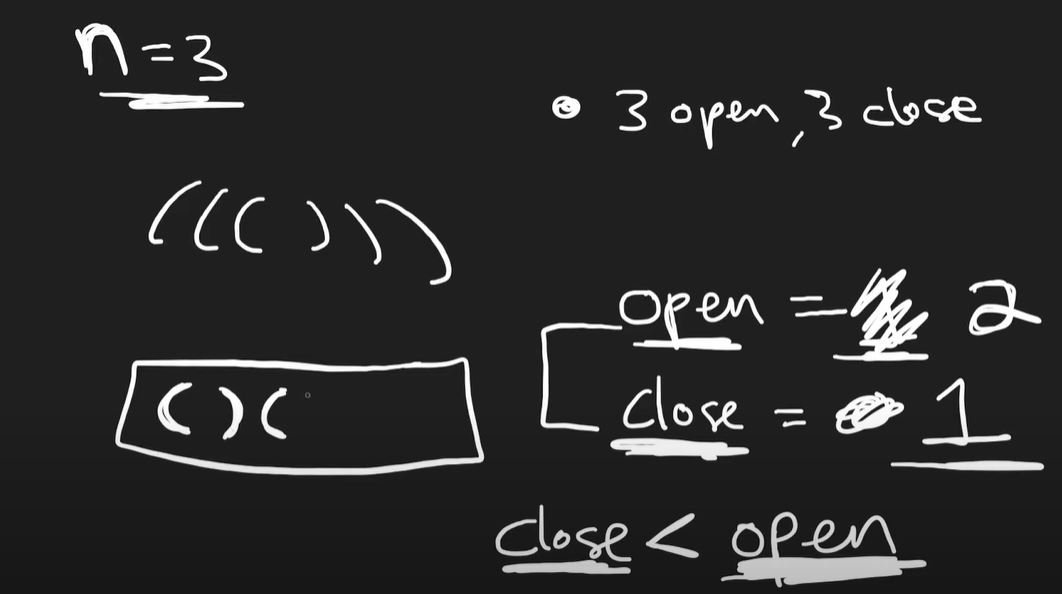

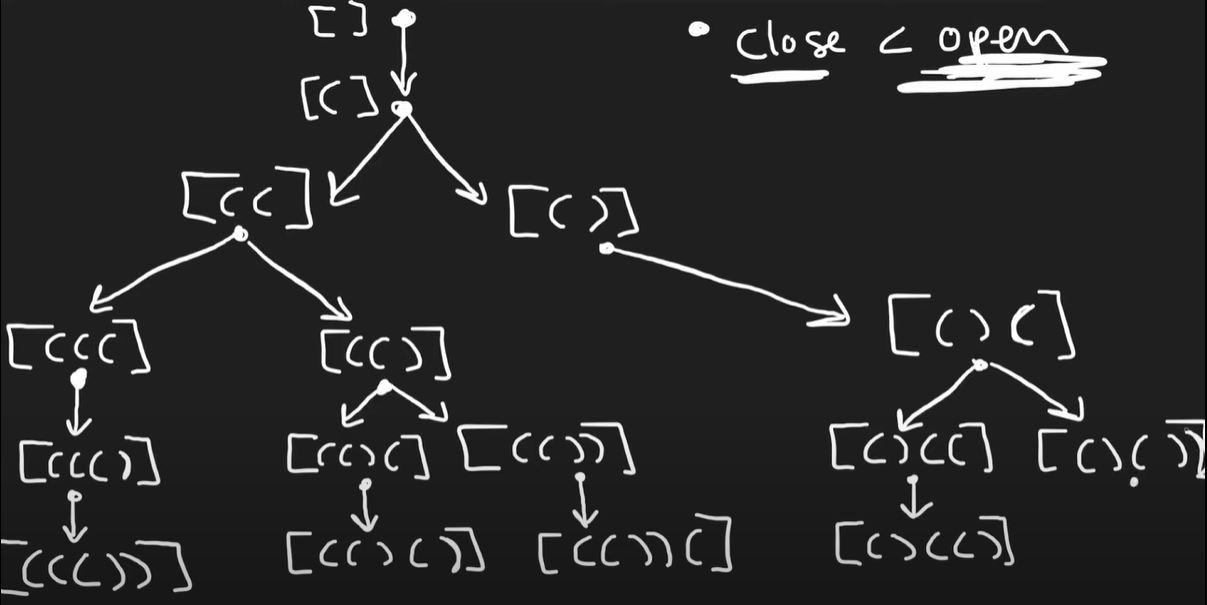

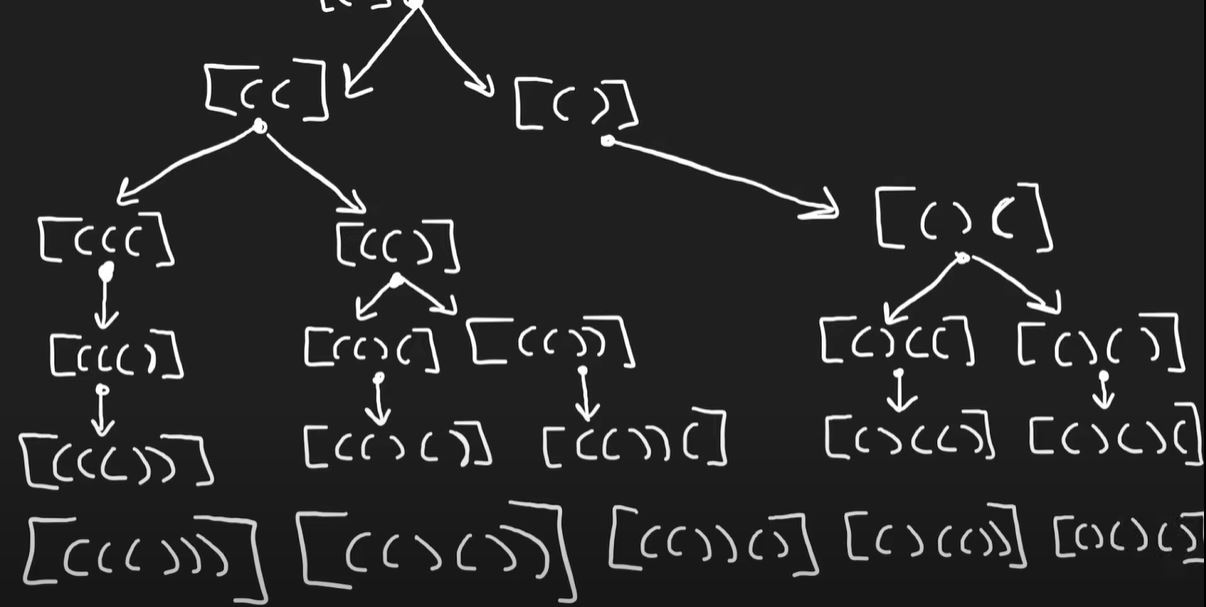


In [ ]:
def generateParentheses(n):
  # Only add open parentheses if open < n
  # Only add a closing parenthese if closed < open
  # Valid if open == closed == n
  stack = []
  res = []

  def backtrack(openN, closedN):
    if openN == closedN == n:
      res.append("".join(stack))
      return
    
    if openN < n:
      stack.append("(")
      backtrack(openN + 1, closedN)
      stack.pop()
    
    if closedN < openN:
      stack.append(")")
      backtrack(openN, closedN + 1)
      stack.pop()
  
  backtrack(0,0)
  return res

print(generateParentheses(4))
print(generateParentheses(3))
print(generateParentheses(2))
print(generateParentheses(1))

['(((())))', '((()()))', '((())())', '((()))()', '(()(()))', '(()()())', '(()())()', '(())(())', '(())()()', '()((()))', '()(()())', '()(())()', '()()(())', '()()()()']
['((()))', '(()())', '(())()', '()(())', '()()()']
['(())', '()()']
['()']


# Method 2: Closure Number

**T = O(4^n / n^(1/2))**

**S = O(4^n / n^(1/2))**

Consider the closure number of a valid parentheses sequence S: the least index >= 0 so that S[0], S[1], ..., S[2*index+1] is valid. Clearly, every parentheses sequence has a unique closure number. We can try to enumerate them individually.

For each closure number c, we know the starting and ending brackets must be at index 0 and 2*c + 1. Then, the 2*c elements between must be a valid sequence, plus the rest of the elements must be a valid sequence.

In [ ]:
def generateParentheses(N):
  if N == 0: 
    return ['']
  ans = []
  for c in range(N):
    for left in generateParentheses(c):
      for right in generateParentheses(N-1-c):
        ans.append('({}){}'.format(left, right))
  return ans

print(generateParentheses(4))
print(generateParentheses(3))
print(generateParentheses(2))
print(generateParentheses(1))

['()()()()', '()()(())', '()(())()', '()(()())', '()((()))', '(())()()', '(())(())', '(()())()', '((()))()', '(()()())', '(()(()))', '((())())', '((()()))', '(((())))']
['()()()', '()(())', '(())()', '(()())', '((()))']
['()()', '(())']
['()']


# **# 18. Permutation**

Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.

For Example:

Input: nums = [1,2,3]

Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

Input: nums = [0,1]

Output: [[0,1],[1,0]]

Input: nums = [1]

Output: [[1]]

# Method 1: Swap & Recursion

**T = O(n^2)**

**S = O(n! x n)**

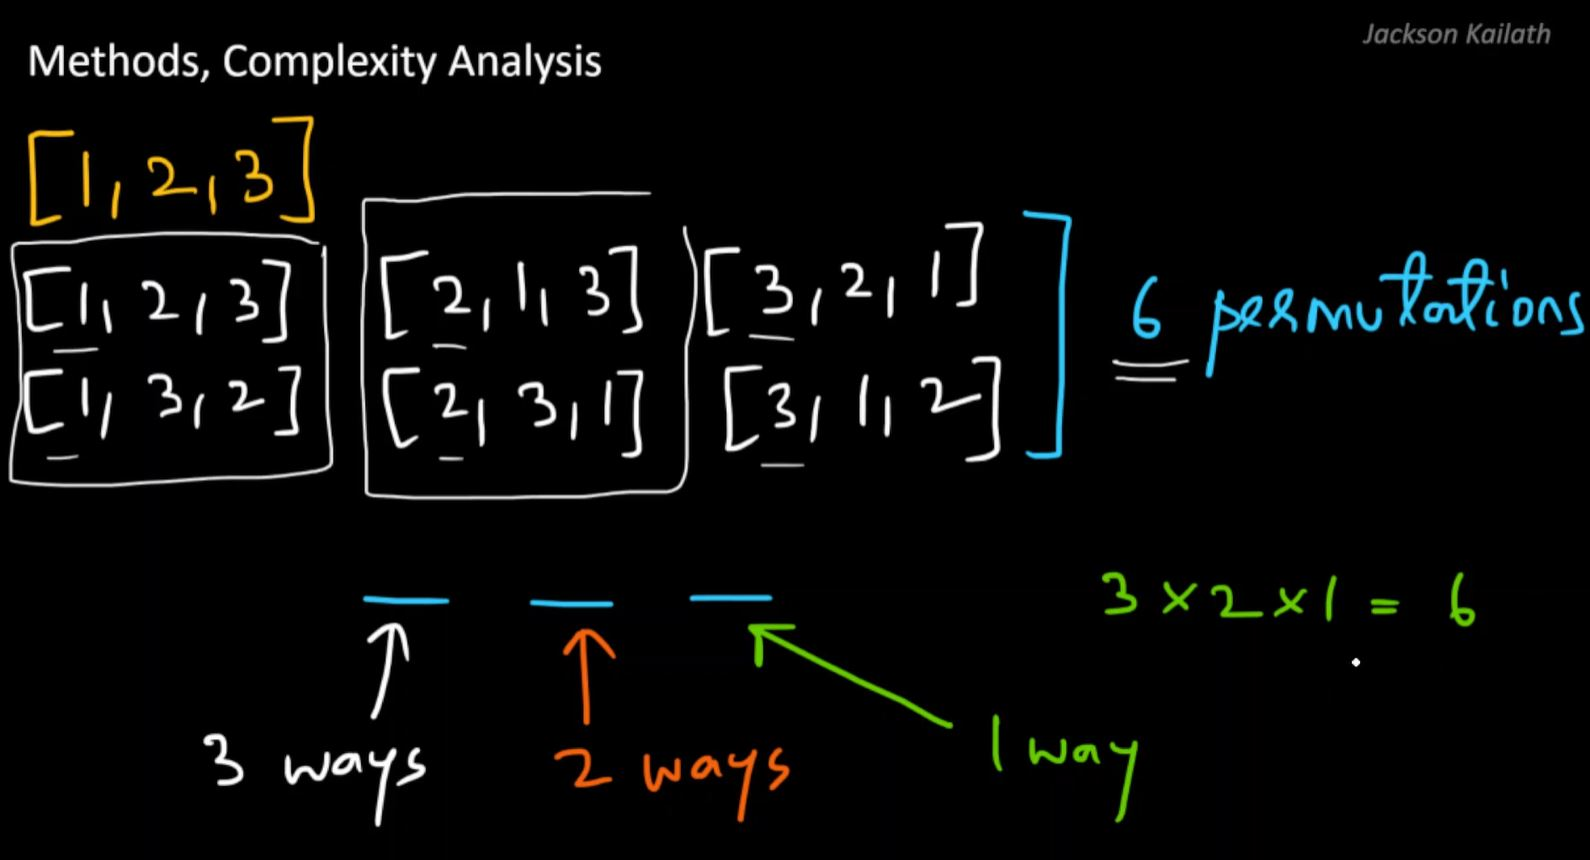

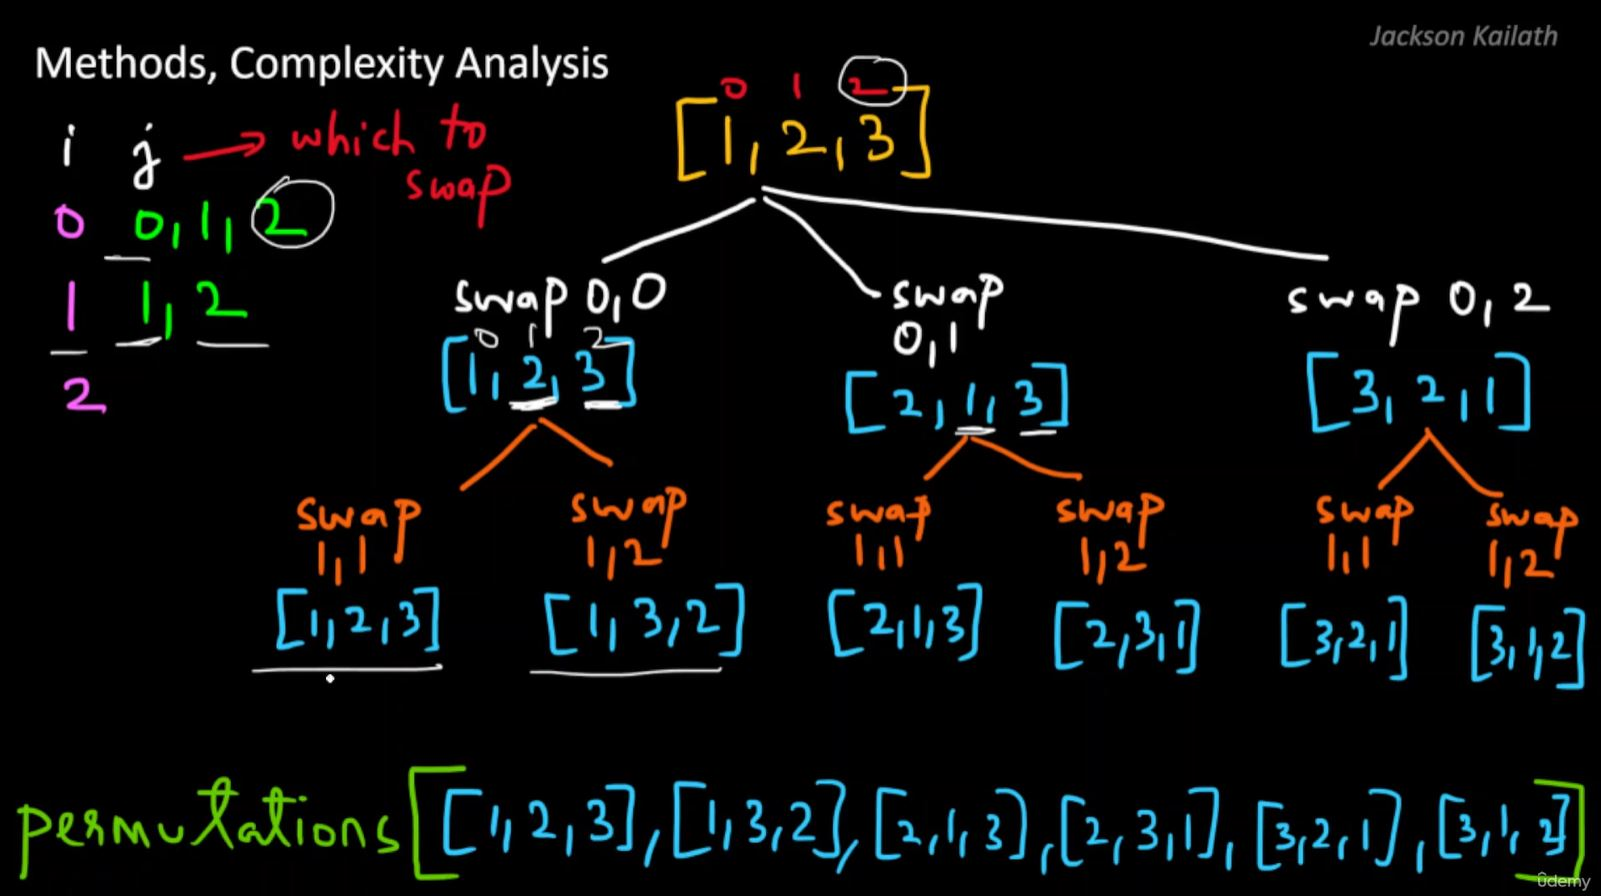

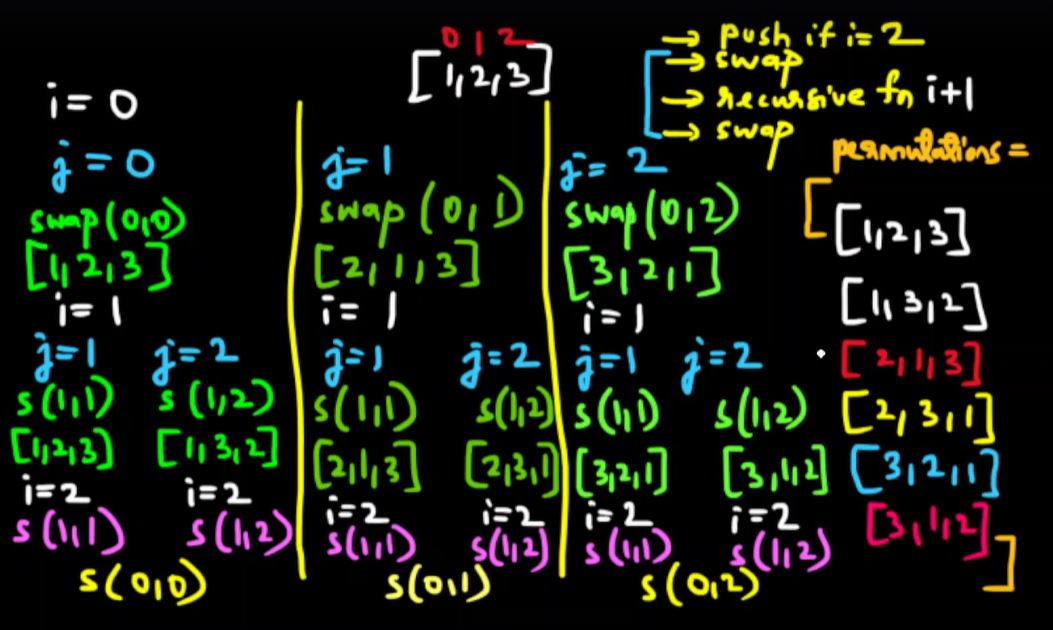

In [ ]:
def all_permutations(nums):
  permutations = []
  
  if len(nums)==0: return [[]]
  
  def helper(nums,i):
    # when i iterate through the entire array
    if i == len(nums) -1:
      # append the original array to result in the end
      permutations.append(nums.copy())
      # finish and return
      return
    # the initial i value will start from 0 to len(nums)-1
    # each time i increase by 1 until reaches the last index of array
    # for each number within this range, exchange nums[i] with nums[j]
    for j in range(i,len(nums)):
      nums[i],nums[j] = nums[j],nums[i]
      helper(nums,i+1)
      nums[i],nums[j] = nums[j],nums[i]
  
  helper(nums,0)
  return permutations


print(all_permutations([0,1]))
print(all_permutations([1,2,3]))
print(all_permutations([1,2,3,4]))

[[0, 1], [1, 0]]
[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]]
[[1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 2, 4], [1, 3, 4, 2], [1, 4, 3, 2], [1, 4, 2, 3], [2, 1, 3, 4], [2, 1, 4, 3], [2, 3, 1, 4], [2, 3, 4, 1], [2, 4, 3, 1], [2, 4, 1, 3], [3, 2, 1, 4], [3, 2, 4, 1], [3, 1, 2, 4], [3, 1, 4, 2], [3, 4, 1, 2], [3, 4, 2, 1], [4, 2, 3, 1], [4, 2, 1, 3], [4, 3, 2, 1], [4, 3, 1, 2], [4, 1, 3, 2], [4, 1, 2, 3]]


# **# 19. Subsets**
Given an integer array nums of unique elements, return all possible  subsets (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.

For Example:

Input: nums = [1,2,3]

Output: [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

Input: nums = [0]

Output: [[],[0]]


# Method 1: Brute Force

T = O(n * 2^n)

S = O(1)

In [1]:
def subsets(nums):
    n = len(nums)
    result = [[]]

    for i in range(1, 2**n):
        subset = []
        for j in range(n):
            if i & (1 << j):
                subset.append(nums[j])
        result.append(subset)

    return result

print(len(subsets([0])), subsets([0]))
print(len(subsets([1,8,7])), subsets([1,8,7]))
print(len(subsets([1,2,3,4])), subsets([1,2,3,4]))


2 [[], [0]]
8 [[], [1], [8], [1, 8], [7], [1, 7], [8, 7], [1, 8, 7]]
16 [[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3], [4], [1, 4], [2, 4], [1, 2, 4], [3, 4], [1, 3, 4], [2, 3, 4], [1, 2, 3, 4]]


# Method 2: Backtrack

T = O(n)

S = O(1)

In [ ]:
def all_subsets(nums):
  all_subsets = []

  if len(nums) == 1:
    return [[], nums]
  
  def helper(nums, i, subset):
    if i == len(nums):
      all_subsets.append(subset.copy())
      return
    
    helper(nums, i+1, subset)
    subset.append(nums[i])
    helper(nums, i+1, subset)
    subset.pop()

  helper(nums, 0, [])
  return all_subsets

print(len(all_subsets([0])), all_subsets([0]))
print(len(all_subsets([1,8,7])), all_subsets([1,8,7]))
print(len(all_subsets([1,2,3,4])), all_subsets([1,2,3,4]))


2 [[], [0]]
8 [[], [7], [8], [8, 7], [1], [1, 7], [1, 8], [1, 8, 7]]
16 [[], [4], [3], [3, 4], [2], [2, 4], [2, 3], [2, 3, 4], [1], [1, 4], [1, 3], [1, 3, 4], [1, 2], [1, 2, 4], [1, 2, 3], [1, 2, 3, 4]]


# **# 20. Subsets II**

Given an integer array nums that may contain duplicates, return all possible 
subsets (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.

For Example:

Input: nums = [1,2,2]

Output: [[],[1],[1,2],[1,2,2],[2],[2,2]]

Input: nums = [0]

Output: [[],[0]]

# Method 1: Brute Force

T = O(n^2)

S = O(1)

In [3]:
def subsetsWithDup(nums):
    nums.sort()  # Sort the input array to handle duplicates
    
    result = [[]]  # Initialize with an empty subset
    
    prev_count = 0
    
    for i in range(len(nums)):
        start = prev_count if i > 0 and nums[i] == nums[i-1] else 0
        count = len(result)
        
        for j in range(start, count):
            subset = result[j] + [nums[i]]
            result.append(subset)
        
        prev_count = count
    
    return result

# Example 1
nums = [1, 2, 2]
print(subsetsWithDup(nums))
# Output: [[], [1], [1, 2], [1, 2, 2], [2], [2, 2]]

# Example 2
nums = [0]
print(subsetsWithDup(nums))
# Output: [[], [0]]


[[], [1], [2], [1, 2], [2, 2], [1, 2, 2]]
[[], [0]]


# Method 2: Backtrack

T = O(n)

S = O(1)

In [4]:
def subsetsWithDup(nums):
    # Sort the input array to handle duplicates
    nums.sort()
    
    def backtrack(start, subset):
        # Add the current subset to the result
        result.append(subset[:])
        
        for i in range(start, len(nums)):
            # Skip duplicates
            if i > start and nums[i] == nums[i-1]:
                continue
            # Add the current element to the subset
            subset.append(nums[i])
            # Recursively generate subsets
            backtrack(i+1, subset)
            # Remove the current element from the subset for the next iteration
            subset.pop()
    
    result = []
    backtrack(0, [])
    return result

# Example 1
nums = [1, 2, 2]
print(subsetsWithDup(nums))
# Output: [[], [1], [1, 2], [1, 2, 2], [2], [2, 2]]

# Example 2
nums = [0]
print(subsetsWithDup(nums))
# Output: [[], [0]]

[[], [1], [1, 2], [1, 2, 2], [2], [2, 2]]
[[], [0]]
